In [241]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#pd.read_csv("index-egalite-fh.csv", sep=';')
df = pd.read_csv("cc_bases-tous-salaries_2019_ARR.csv", sep=';')

In [257]:
# tableau qui contient le salaire horraire moyen pour un adulte de 18 à 25ans
df1825 = df[["CODGEO","SNHMF1819","SNHMH1819"]] 
print(df1825)
# tableau qui contient le salaire horraire moyen pour un adulte de 26 à 50ans
df2650 = df[["CODGEO","SNHMF2619","SNHMH2619"]] 
print(df2650)
# tableau qui contient le salaire horraire moyen pour un adulte de 26 à 50ans
df50 = df[["CODGEO","SNHMF5019","SNHMH5019"]]
print(df50)

    CODGEO  SNHMF1819  SNHMH1819
0      011   9.882337  10.570766
1      012   9.818083  10.718246
2      013   9.951638  10.428989
3      014   9.946630  10.618059
4      021   9.797048  10.483760
..     ...        ...        ...
327   9732   9.773554   9.591610
328   9741   9.336551   9.328012
329   9742   8.921099   9.115763
330   9743   9.161682   9.176744
331   9744   9.063896   9.535406

[332 rows x 3 columns]
    CODGEO  SNHMF2619  SNHMH2619
0      011  13.177290  15.749377
1      012  13.419491  15.937717
2      013  13.325494  15.184363
3      014  12.135327  14.504693
4      021  12.495044  14.466056
..     ...        ...        ...
327   9732  11.732949  11.689126
328   9741  13.776096  14.171782
329   9742  12.159181  12.709649
330   9743  12.023520  12.397189
331   9744  13.471189  14.459663

[332 rows x 3 columns]
    CODGEO  SNHMF5019  SNHMH5019
0      011  13.767721  18.328561
1      012  14.417950  18.996117
2      013  14.751296  18.195413
3      014  13.088489  16.66

0.5694130907463304


Text(0.5, 1.0, 'Salaire H/F heure moyen en fonction de chaque région')

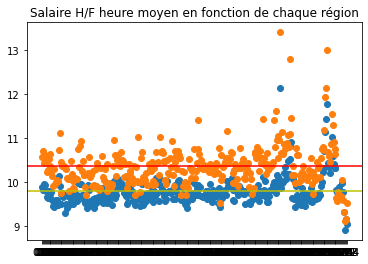

In [262]:
#ecart de salaire moyen heure H/F 18-25ans toutes regions confondu
moyenneH1825 = df1825["SNHMH1819"].mean()
moyenneF1825 = df1825["SNHMF1819"].mean()
ecartMoy1825 = moyenneH1825 - moyenneF1825
print(ecartMoy1825)
plt.scatter(df1825["CODGEO"], df1825["SNHMF1819"])
plt.scatter(df1825["CODGEO"], df1825["SNHMH1819"])
plt.axhline(y=moyenneH1825, color='r', linestyle='-')
plt.axhline(y=moyenneF1825, color='y', linestyle='-')
plt.title("Salaire H/F heure moyen en fonction de chaque région")

0.5694130907463304
1.9279792760147725


Text(0.5, 1.0, 'Salaire H/F heure moyen en fonction de chaque région')

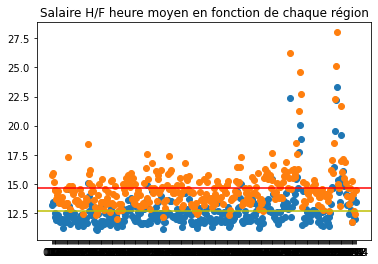

In [261]:
moyenneF2650 = df2650["SNHMF2619"].mean()
moyenneH2650 = df2650["SNHMH2619"].mean()
ecartMoy2650 = moyenneH2650 - moyenneF2650
print(ecartMoy2650)
plt.scatter(df2650["CODGEO"], df2650["SNHMF2619"])
plt.scatter(df2650["CODGEO"], df2650["SNHMH2619"])
plt.axhline(y=moyenneH2650, color='r', linestyle='-')
plt.axhline(y=moyenneF2650, color='y', linestyle='-')
plt.title("Salaire H/F 26-50ans heure moyen en fonction de chaque région")


3.7278404661310134


Text(0.5, 1.0, 'Salaire H/F 51+ heure moyen en fonction de chaque région')

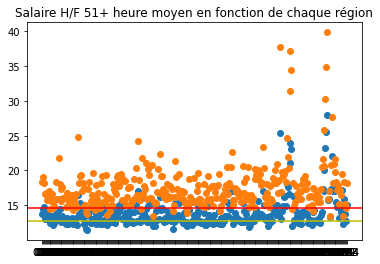

In [268]:
moyenneF50 = df50["SNHMF5019"].mean()
moyenneH50 = df50["SNHMH5019"].mean()
ecartMoy50 = moyenneH50 - moyenneF50
print(ecartMoy50)
plt.scatter(df50["CODGEO"], df50["SNHMF5019"])
plt.scatter(df50["CODGEO"], df50["SNHMH5019"])
plt.axhline(y=moyenneH2650, color='r', linestyle='-')
plt.axhline(y=moyenneF2650, color='y', linestyle='-')
plt.title("Salaire H/F 51+ heure moyen en fonction de chaque région")

<Figure size 432x288 with 0 Axes>

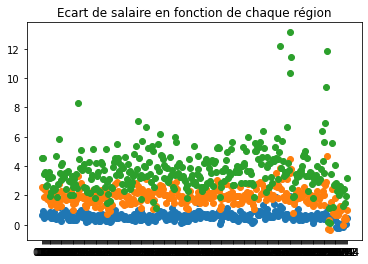

<Figure size 432x288 with 0 Axes>

In [270]:
dfEcart18 = pd.DataFrame(df1825["SNHMH1819"]-df1825["SNHMF1819"],columns=['Ecart'])
dfEcart26 = pd.DataFrame(df2650["SNHMH2619"]-df2650["SNHMF2619"],columns=['Ecart'])
dfEcart50 = pd.DataFrame(df50["SNHMH5019"]-df50["SNHMF5019"],columns=['Ecart'] )
dfEcart18["CODGEO"] = df1825["CODGEO"]
dfEcart26["CODGEO"] = df2650["CODGEO"]
dfEcart50["CODGEO"] = df50["CODGEO"]


#print(dfEcart18)
plt.scatter(df1825["CODGEO"],dfEcart18["Ecart"])
plt.scatter(df1825["CODGEO"],dfEcart26["Ecart"])
plt.scatter(df1825["CODGEO"],dfEcart50["Ecart"])

plt.title("Ecart de salaire en fonction de chaque région")
plt.figure()

{'whiskers': [<matplotlib.lines.Line2D at 0x47e107820>,
 'caps': [<matplotlib.lines.Line2D at 0x47e107d60>,
 'boxes': [<matplotlib.lines.Line2D at 0x47e107580>],
 'medians': [<matplotlib.lines.Line2D at 0x47e4902e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x47e490580>],
 'means': []}

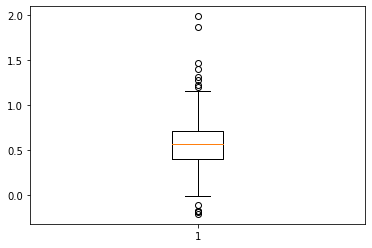

In [226]:
plt.boxplot(dfEcart18["Ecart"])
plt.title("boite à moustache de de l'écart de salaire ")

In [278]:
#On va chercher à récupérer les 10 villes qui ont l'écart le plus grand
dfEcart18.sort_values("Ecart",ascending=False).head(10)
#783 = Saint-Germain-en-Laye
#733 = Saint-Jean-de-Maurienne
#513 = Reims
#731 = Albertville
#691 = Lyon
#751 = Bayonne
#923 = Boulogne-Billancourt
#062 = Nice
#762 = Le Havre
#423 = Saint-Étienne

,Ecart,CODGEO
270,1.986410,783
254,1.862654,733
170,1.470904,513
252,1.396303,731
240,1.314401,691
259,1.273709,751
310,1.227052,923
19,1.200788,062
261,1.150817,762
141,1.127475,423


In [273]:
dfEcart18.sort_values("Ecart",ascending=True).head(10)
#9722 = La Trinité
#9712 = Pointe-à-Pitre
#9732 = Saint-Laurent-du-Maroni
#9711 = Basse-Terre
#9723 = Le Marin
#9741 = Saint-Denis
#9743 = Saint-Benoît
#9724 = Saint-Pierre
#9731 = Cayenne
#581  = Château-Chinon (Ville)

,Ecart,CODGEO
323,-0.212076,9722
321,-0.195128,9712
327,-0.181944,9732
320,-0.174219,9711
324,-0.108557,9723
328,-0.008538,9741
330,0.015062,9743
325,0.066381,9724
326,0.078294,9731
193,0.078912,581


In [239]:
# On remarque que les villes pour les jeunes de 18 à 25 est négative, 
# donc les femmes touchent plus que les hommes à l'heure dans ces villes
# On remarque également que ces villes sont toutes des villes d'outre mer
# après quelques recherche on remarque que le nombre de femme en outre mer est supèrieur à celui des hommes
# On suppose donc que les valeurs qui nous sont données sont sur l'ensemble des H/F en incluant ceux qui ne 
# travailles pas 
# je peux finalement supposer que l'écart de salaire est lié au fait qu'il y a plus 
# d'individu qui travaille que le sexe opposé.

        Ecart CODGEO
310  4.667232    923
270  4.509753    783
259  3.874721    751
271  3.818076    784
254  3.513422    733
269  3.493858    782
39   3.345333    131
261  3.149578    762
113  3.139783    336
266  3.136942    774
        Ecart CODGEO
313 -0.356848    933
311 -0.281744    931
327 -0.043823   9732
312  0.342420    932
330  0.373669   9743
328  0.395686   9741
329  0.550468   9742
322  0.646007   9721
318  0.684412    952
71   0.704054    231


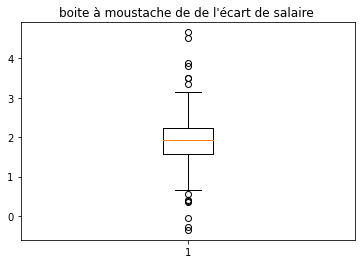

In [277]:
plt.boxplot(dfEcart26["Ecart"])
plt.title("boite à moustache de de l'écart de salaire ")
#On va chercher à récupérer les 10 villes qui ont l'écart le plus grand
print(dfEcart26.sort_values("Ecart",ascending=False).head(10))
print(dfEcart26.sort_values("Ecart",ascending=True).head(10))

In [ ]:
#923 Boulogne-Billancourt
#783 Saint-Germain-en-Laye
#751 Bayonne
#784 Versailles
#733 Saint-Jean-de-Maurienne
#782 Rambouillet
#131 Aix-en-Provence
#762 Le Havre
#336 Arcachon
#774 Fontainebleau

#933
#931
#9732
#932
#9743
#9741
#9742
#9721
#952
#231

         Ecart CODGEO
270  13.130472    783
259  12.213147    751
310  11.875311    923
271  11.410581    784
269  10.334815    782
309   9.382673    922
39    8.305458    131
104   7.056354    313
308   6.956939    921
266   6.688112    774
        Ecart CODGEO
313  0.140356    933
311  0.177445    931
124  1.124574    364
312  1.129963    932
316  1.215016    943
327  1.254295   9732
71   1.462861    231
329  1.510218   9742
121  1.530669    361
74   1.607095    242


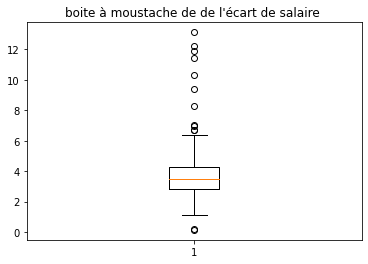

In [279]:
plt.boxplot(dfEcart50["Ecart"])
plt.title("boite à moustache de de l'écart de salaire ")
#On va chercher à récupérer les 10 villes qui ont l'écart le plus grand
print(dfEcart50.sort_values("Ecart",ascending=False).head(10))
print(dfEcart50.sort_values("Ecart",ascending=True).head(10))

In [280]:
#783
#751
#923
#784
#782
#922
#131
#313
#921
#774

#933
#931
#364
#932
#943
#9732
#231
#9742
#361
#242

SyntaxError: invalid syntax (2371885224.py, line 1)